In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')

In [3]:
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
train.shape

(42000, 785)

In [5]:
test.shape

(28000, 784)

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Droing target column for the training set
X_train = train.drop(labels = ['label'], axis = 1)

# The target column
y_train = train['label']

In [9]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


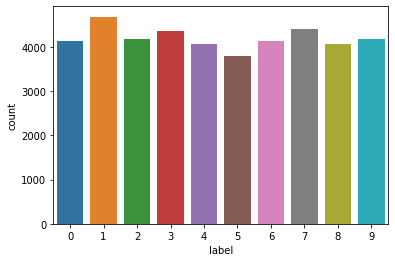

In [10]:
sns.countplot(y_train);

In [11]:
X_train.isnull().sum().sum()
# great no null values

0

In [12]:
y_train.isnull().sum().sum()

0

In [13]:
# scaling the data 
X_train = X_train / 255.00
test = test / 255.0

- Each image of the numbers consist of 255 pixels so we deivde each one by 255 for Nueral Networks Later

In [14]:
# Reshaping the data to 3 dimensions (height, width, canal)
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

- We reshaped the data to 3 dimensions (28px x 28px) instead of padnas DataFrame 1d vector 784 values
- this will make the computations much faster
 

In [15]:
from keras.utils.np_utils import to_categorical

# Encoding Labels
y_train = to_categorical(y_train, num_classes = 10)

-  converted the label column from 3 as a number to [0,0,0,1,0,0,0,0,0,0]

In [16]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Spliting the training data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1)

# Convolutional Model

- How CNN work
- Each feature is like a mini-image—a small two-dimensional array of values. Features match common aspects of the images. In the case of X images, features consisting of diagonal lines and a crossing capture all the important characteristics of most X’s. These features will probably match up to the arms and center of any image of an X ,After doing this for every feature pixel in every convolutional layer and every weight in every fully connected layer, the new weights give an answer that works slightly better for that image. This is then repeated with each subsequent image in the set of labeled images.

-This is great video by Codebasics he explained it well

https://www.youtube.com/watch?v=zfiSAzpy9NM&t=4s&ab_channel=codebasics

In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [20]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [22]:
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

In [23]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [24]:
# Setting learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 20
batch_size = 86

In [25]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs,
                   validation_data = (X_test, y_test), verbose = 2)

Epoch 1/20
440/440 - 5s - loss: 0.2560 - accuracy: 0.9193 - val_loss: 0.0732 - val_accuracy: 0.9798
Epoch 2/20
440/440 - 2s - loss: 0.0726 - accuracy: 0.9793 - val_loss: 0.0506 - val_accuracy: 0.9848
Epoch 3/20
440/440 - 2s - loss: 0.0553 - accuracy: 0.9832 - val_loss: 0.0432 - val_accuracy: 0.9855
Epoch 4/20
440/440 - 2s - loss: 0.0455 - accuracy: 0.9867 - val_loss: 0.0496 - val_accuracy: 0.9888
Epoch 5/20
440/440 - 2s - loss: 0.0413 - accuracy: 0.9872 - val_loss: 0.0401 - val_accuracy: 0.9886
Epoch 6/20
440/440 - 2s - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0641 - val_accuracy: 0.9852
Epoch 7/20
440/440 - 2s - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0376 - val_accuracy: 0.9900
Epoch 8/20
440/440 - 2s - loss: 0.0324 - accuracy: 0.9906 - val_loss: 0.0425 - val_accuracy: 0.9893
Epoch 9/20
440/440 - 2s - loss: 0.0298 - accuracy: 0.9914 - val_loss: 0.0351 - val_accuracy: 0.9883
Epoch 10/20
440/440 - 2s - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.0359 - val_accuracy: 0.9895

visualizations of loss and accuracy 

In [26]:
evaluation = model.evaluate(X_test,y_test)
print("validation_loss is {} , validation_acc is {}".format(evaluation[0],evaluation[1]))

132/132 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9924
validation_loss is 0.030589723959565163 , validation_acc is 0.9923809766769409


In [27]:
df_loss_acc = pd.DataFrame(history.history)
df_loss=df_loss_acc[['loss','val_loss']]
df_acc=df_loss_acc[['accuracy','val_accuracy']]

<AxesSubplot:>

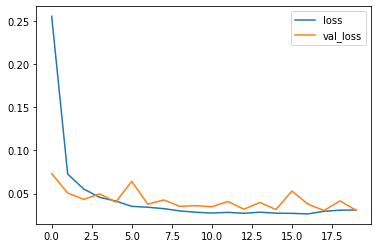

In [28]:
df_loss.plot()

<AxesSubplot:>

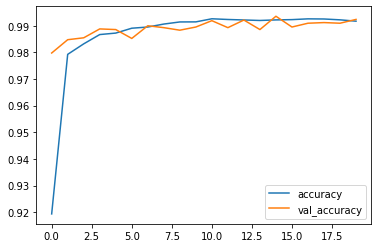

In [29]:
df_acc.plot()

Preparing for confusion Matrix

In [30]:
y_predicted = model.predict(X_test)
y_predicted[0]

array([2.31460087e-10, 9.99997497e-01, 1.97870833e-07, 9.00445607e-10,
       1.82604606e-06, 1.17299495e-08, 3.70548996e-08, 2.14622929e-07,
       7.63032375e-08, 9.49824308e-09], dtype=float32)

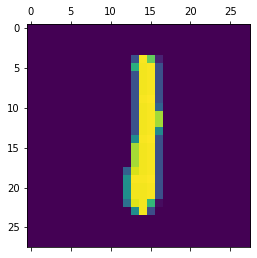

In [31]:
plt.matshow(X_test[0])

In [32]:
np.argmax(y_predicted[0])

1

As you can see it's working well

In [33]:
results = model.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [34]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submissiom.csv",index=False)